In [1]:
import pandas as pd 
import numpy as np
dataset=pd.read_csv('D:\FlibRobo\Datasets\Power_Plant.csv')
dataset.drop('Unnamed: 0',axis=1,inplace=True)

In [2]:
dataset.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [4]:
dataset.shape

(907, 27)

In [5]:
dataset['commissioning_year'].nunique()

73

In [6]:
dataset.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

### Drop columns which have not present any data.

#### In Columns estimated_generation_gwh,generation_gwh_2019,other_fuel2,other_fuel3,wepp_id are not present any values, so we can't fill that values. Hence we drop these columns.

In [7]:
dataset.drop(["other_fuel2","other_fuel3","wepp_id","generation_gwh_2013","generation_gwh_2019","estimated_generation_gwh"],axis=1,inplace=True)

In [8]:
col=dataset.columns
col

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source'],
      dtype='object')

In [9]:
round(dataset.isna().sum()/len(dataset)*100)

country                    0.0
country_long               0.0
name                       0.0
gppd_idnr                  0.0
capacity_mw                0.0
latitude                   5.0
longitude                  5.0
primary_fuel               0.0
other_fuel1               78.0
commissioning_year        42.0
owner                     62.0
source                     0.0
url                        0.0
geolocation_source         2.0
year_of_capacity_data     43.0
generation_gwh_2014       56.0
generation_gwh_2015       53.0
generation_gwh_2016       52.0
generation_gwh_2017       51.0
generation_gwh_2018       51.0
generation_data_source    50.0
dtype: float64

#### In dataset,
##### 1. Latitude and logitude have 5% missing values.
##### 2. In Other fuel 1 has 78% missing values.
##### 3. Commisioning year has 42% missing values.
##### 4. In owner has 62% missing values.
##### 5. In Total generation growth 57% missing values.

#### In dataset there are so many missing values if we fill it by using mean or median in that column majority values are get mean or meadian and In that situation performance of model or result get biased. Hence we can not fill it by using mean or median.


#### Here we may use Interapolation or Extrapolation.
#### Interapolation: Interpolation is especially useful to estimate missing or lost past records to complete the records for a project or use case.
#### Extrapolation:  use extrapolation when you want to predict a value that falls outside of a set of data points and use known values to predict an unknown value

#### Interpolation often provides a valid estimate of an unknown value, which is why it's considered a more reliable estimation method than extrapolation.

#### Interpolation is a technique mostly used to impute missing values in the data frame or series while preprocessing data.

In [10]:
dataset.interpolate(method ='linear', limit_direction ='forward',inplace=True)

#### We make new columns Total genetation growth by using columns generation growth from year 2014 to 2018.

In [11]:
dataset['Total_generation growth']=dataset['generation_gwh_2014']+dataset['generation_gwh_2015']+dataset['generation_gwh_2016']+dataset['generation_gwh_2017']+dataset['generation_gwh_2018']

#### by using generation growth from year 2013 to 2018 we make new column total generation growth hence we drop columns gerenration growth of year 2014, 2015, 2016,2017, 2018.

In [12]:
dataset.drop(['name', 'gppd_idnr','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018','generation_data_source','year_of_capacity_data'],axis=1,inplace=True)

In [13]:
dataset.isna().sum()

country                      0
country_long                 0
capacity_mw                  0
latitude                     0
longitude                    0
primary_fuel                 0
other_fuel1                709
commissioning_year           0
owner                      565
source                       0
url                          0
geolocation_source          19
Total_generation growth      3
dtype: int64

In [14]:
dataset['Total_generation growth'].dtype

dtype('float64')

In [15]:
dataset['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [16]:
dataset.owner.value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [17]:
dataset['owner'].nunique()

280

In [18]:
dataset.isna().sum()

country                      0
country_long                 0
capacity_mw                  0
latitude                     0
longitude                    0
primary_fuel                 0
other_fuel1                709
commissioning_year           0
owner                      565
source                       0
url                          0
geolocation_source          19
Total_generation growth      3
dtype: int64

In [19]:
cols=dataset.columns
cols

Index(['country', 'country_long', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'url', 'geolocation_source', 'Total_generation growth'],
      dtype='object')

In [20]:
for x in cols:
    if dataset[x].dtype=='O':
        dataset[x]=dataset[x].fillna(dataset[x].value_counts().index[0])
    else:
        dataset[x]=dataset[x].fillna(dataset[x].median())
        

In [21]:
dataset.isna().sum()

country                    0
country_long               0
capacity_mw                0
latitude                   0
longitude                  0
primary_fuel               0
other_fuel1                0
commissioning_year         0
owner                      0
source                     0
url                        0
geolocation_source         0
Total_generation growth    0
dtype: int64

In [22]:
dataset.country.value_counts()

IND    907
Name: country, dtype: int64

In [23]:
dataset.country_long.value_counts()

India    907
Name: country_long, dtype: int64

#### In dataset has only one Country India. so we can remove this column.

In [24]:
dataset.drop(['country','country_long'],axis=1,inplace=True)

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("ticks")

### Boxplot Before Detecting Outliers 

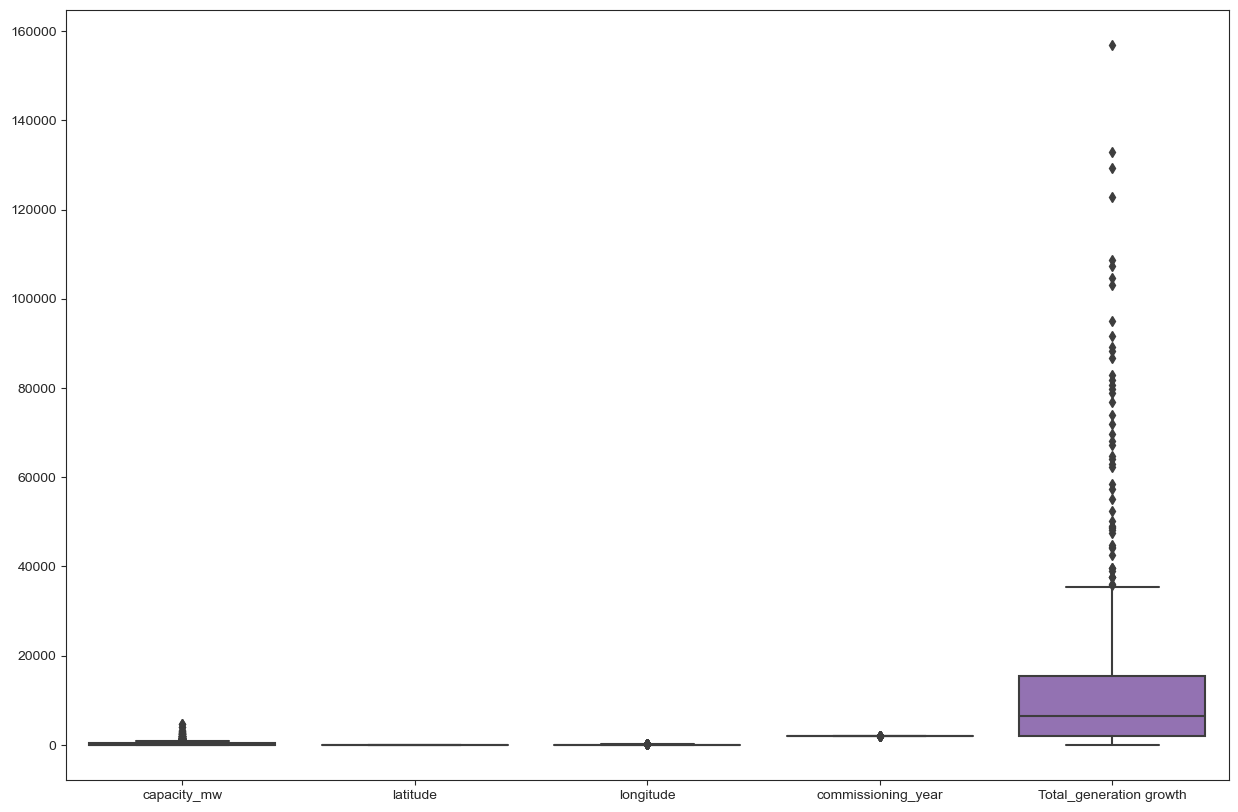

In [26]:
plt.figure(figsize=(15,10))
sns.boxplot(data=dataset)
plt.show()

<AxesSubplot:>

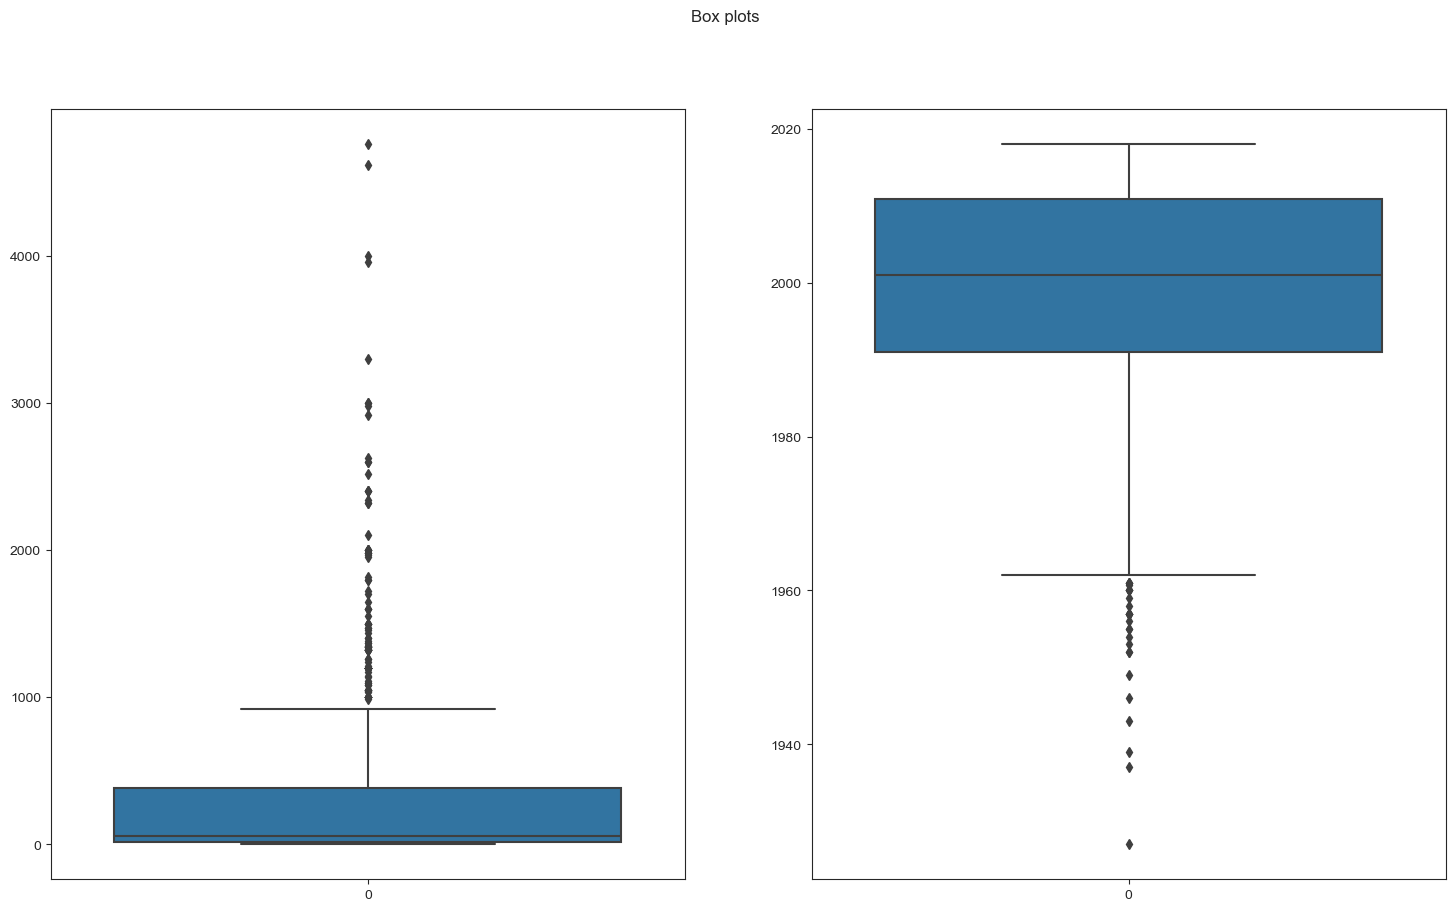

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

fig.suptitle('Box plots')

# sns.boxplot(ax=axes[0, 0], data=dataset['latitude'])
# sns.boxplot(ax=axes[0, 1], data=dataset['longitude'])

sns.boxplot(ax=axes[0], data=dataset['capacity_mw'])
sns.boxplot(ax=axes[1], data=dataset['commissioning_year'])
# sns.boxplot(ax=axes[1, 2], data=dataset[])

<AxesSubplot:title={'center':'Box plots'}>

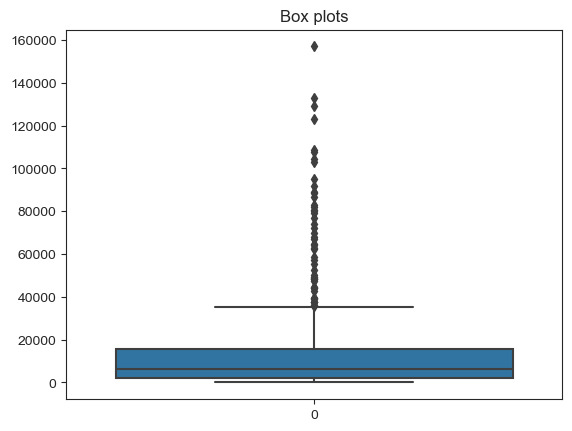

In [28]:
# fig, axes = plt.subplots(2, 3, figsize=(18, 10))
plt.title('Box plots')
sns.boxplot(data=dataset['Total_generation growth'])

### find Outliers Using Interquartile Range

In [29]:
col=dataset.columns

q1 , q3 =dataset[col].quantile(0.25),dataset[col].quantile(0.75)
iqr = q3 - q1
ll = q1-1.5*iqr
ul = q3 + 1.5*iqr
((dataset[col]<=ll)|(dataset[col]>=ul)).sum()

C:\Users\pc\AppData\Local\Temp\ipykernel_29532\1316446556.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((dataset[col]<=ll)|(dataset[col]>=ul)).sum()


Total_generation growth     50
capacity_mw                113
commissioning_year          28
geolocation_source           0
latitude                     0
longitude                   55
other_fuel1                  0
owner                        0
primary_fuel                 0
source                       0
url                          0
dtype: int64

### Replace Outliers by Median

In [30]:
for col in dataset.columns:
    if dataset[col].dtypes != 'object':
        q1 , q3 =dataset[col].quantile(0.25),dataset[col].quantile(0.75)
        iqr = q3 - q1
        ll = q1-1.5*iqr
        ul = q3 + 1.5*iqr
        dataset[col] = np.where(dataset[col]>=ul,dataset[col].median(),np.where(dataset[col]<=ll,dataset[col].median(),dataset[col]))


#### In Longitude and Latitude columns if we replace outliers values it may change geolocation hence, we can not replace it.

### Boxplot after Dealing With Outliers

<AxesSubplot:>

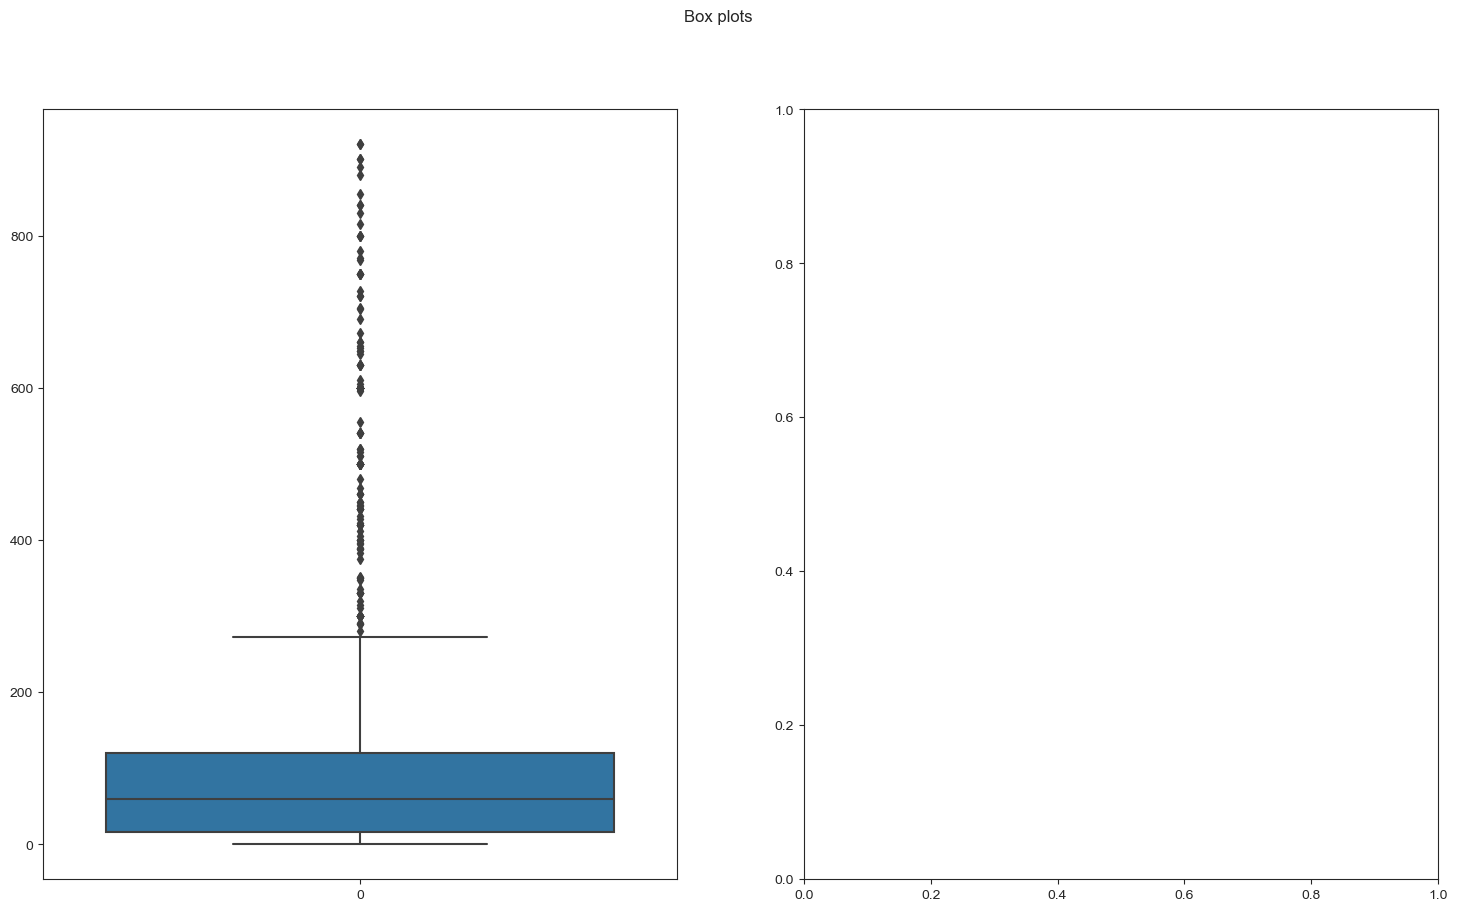

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Box plots')
# sns.boxplot(ax=axes[0, 0], data=dataset['latitude'])
# sns.boxplot(ax=axes[0, 1], data=dataset['longitude'])
sns.boxplot(ax=axes[0], data=dataset['capacity_mw'])


<AxesSubplot:title={'center':'Box plots'}>

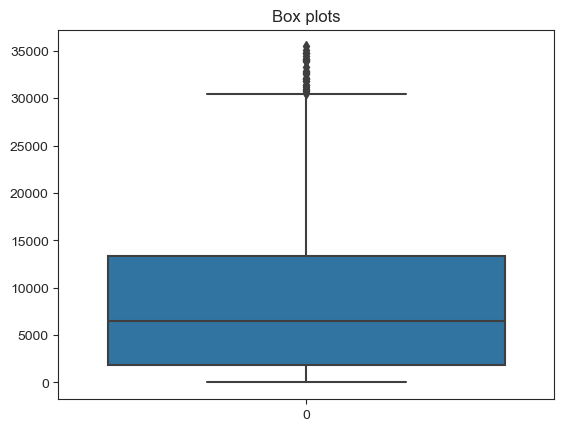

In [32]:
plt.title('Box plots')
sns.boxplot(data=dataset['Total_generation growth'])

In [33]:
# fig, axes = plt.subplots(2, 3, figsize=(8,5))

# fig.suptitle('Box plots')
# sns.boxplot(ax=axes[0, 0], data=dataset['generation_gwh_2014'])
# sns.boxplot(ax=axes[0, 1], data=dataset['generation_gwh_2015'])
# sns.boxplot(ax=axes[0, 2], data=dataset['generation_gwh_2016'])
# sns.boxplot(ax=axes[1, 0], data=dataset['generation_gwh_2017'])
# sns.boxplot(ax=axes[1,1], data=dataset['generation_gwh_2018'])
# # sns.boxplot(ax=axes[1, 2], data=dataset['year_of_capacity_data'])
# # sns.boxplot(ax=axes[1, 2], data=dataset[])

### Descrptive Analysis


In [34]:
dataset.describe().round()

,capacity_mw,latitude,longitude,commissioning_year,Total_generation growth
count,907.0,907.0,907.0,907.0,907.0
mean,130.0,21.0,77.0,2000.0,8790.0
std,195.0,6.0,4.0,13.0,8574.0
min,0.0,8.0,69.0,1962.0,0.0
25%,17.0,17.0,74.0,1993.0,1877.0
50%,59.0,22.0,77.0,2001.0,6442.0
75%,120.0,25.0,78.0,2011.0,13338.0
max,920.0,35.0,87.0,2018.0,35449.0


In [35]:
# Average electrical generating capacity is 164 megawatts.
# Average generation growth is 9112.

In [36]:
dataset.describe(include='object')

,primary_fuel,other_fuel1,owner,source,url,geolocation_source
count,907,907,907,907,907,907
unique,8,3,280,191,304,3
top,Coal,Oil,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI
freq,258,904,569,519,519,784


C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

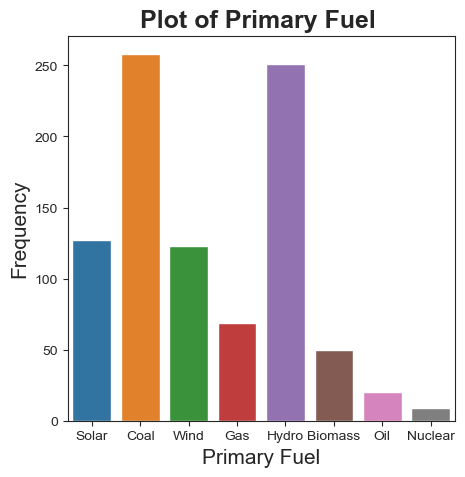

In [37]:
plt.figure(figsize = (5,5))
sns.countplot('primary_fuel', data=dataset)
plt.title("Plot of Primary Fuel ", fontsize=18,fontweight="bold")
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel("Primary Fuel", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)

#### from plot , primary fuel has maximum as compare to other primary fuel and Nuclear Fuel has very less.

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


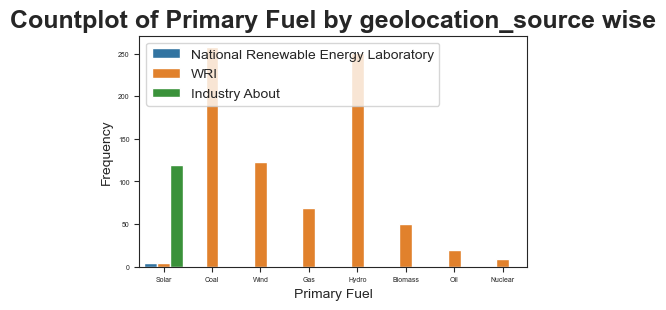

In [38]:
plt.figure(figsize = (5,3))
sns.countplot('primary_fuel', data=dataset,hue='geolocation_source')
plt.title("Countplot of Primary Fuel by geolocation_source wise", fontsize=18,fontweight="bold")
plt.xticks(size = 5)
plt.yticks(size = 5)
plt.xlabel("Primary Fuel", fontsize = 10)
plt.ylabel("Frequency", fontsize = 10)
plt.legend()

#### geolocation source Industry has maximum solar primary fuel.In geolocation source WRI has maximum Fuels.

In [39]:
dataset.owner.nunique()

280

In [40]:
dataset.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'Total_generation growth'],
      dtype='object')

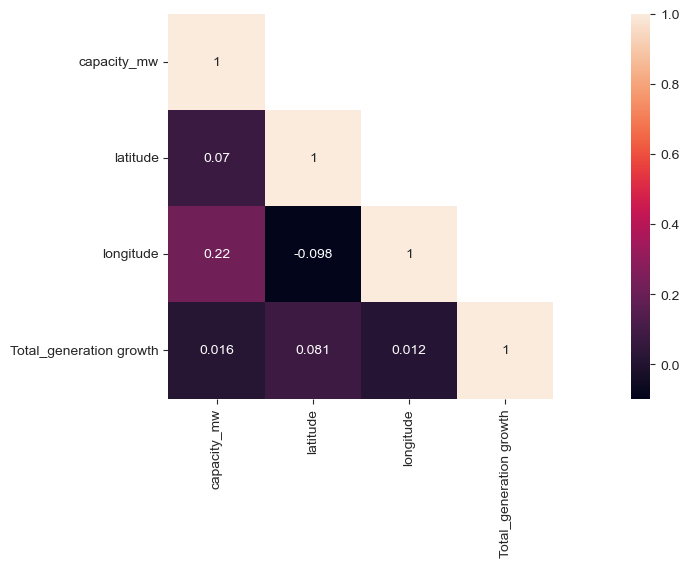

In [41]:
df = dataset[['capacity_mw', 'latitude', 'longitude','Total_generation growth']]
cor_mat = df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True);

#### In dataset, there is very low correlation between variables.

Text(0.5, 1.0, 'Scatter Plot')

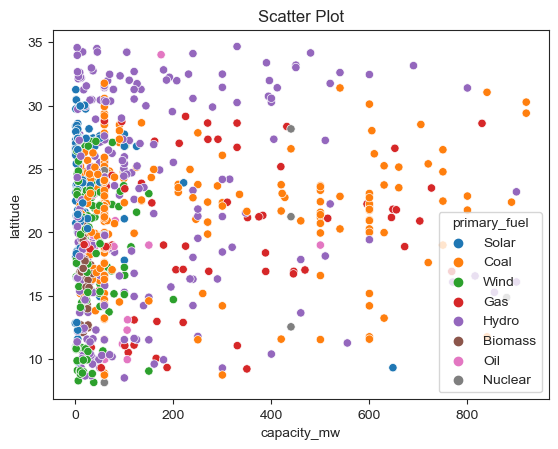

In [42]:
# scatter Plot
sns.scatterplot(x='capacity_mw',y='latitude',hue='primary_fuel',data=dataset)
plt.title('Scatter Plot')

#### There is no correlation between Capacity in megawatts.

Text(0.5, 1.0, 'Scatter Plot')

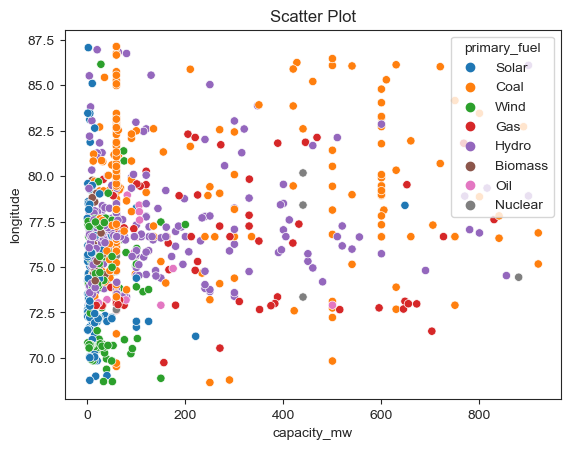

In [43]:
# scatter Plot
sns.scatterplot(x='capacity_mw',y='longitude',hue='primary_fuel',data=dataset)
plt.title('Scatter Plot')

#### There is very low correlation between Longitude and capacity in megawatts.

Text(0.5, 1.0, 'Scatter Plot')

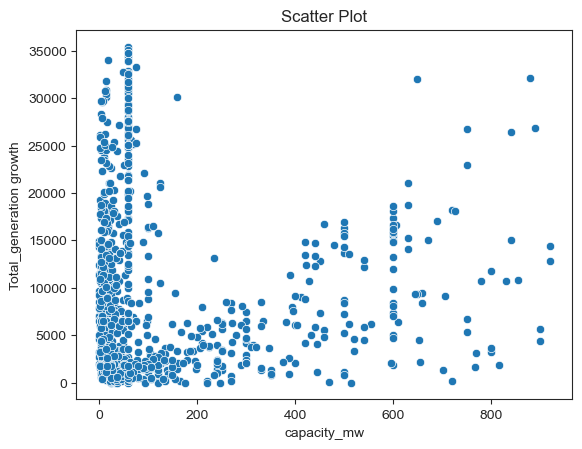

In [45]:
# scatter Plot
sns.scatterplot(x='capacity_mw',y='Total_generation growth',data=dataset)
plt.title('Scatter Plot')

In [46]:
dataset.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'Total_generation growth'],
      dtype='object')

In [47]:
# 
pd.pivot_table(dataset,index=['geolocation_source'],values=['primary_fuel'],aggfunc=['value_counts'])

value_counts
geolocation_source                   primary_fuel              
Industry About                       Solar                  119
National Renewable Energy Laboratory Solar                    4
WRI                                  Coal                   258
                                     Hydro                  251
                                     Wind                   123
                                     Gas                     69
                                     Biomass                 50
                                     Oil                     20
                                     Nuclear                  9
                                     Solar                    4

In [48]:
dataset.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'Total_generation growth'],
      dtype='object')

In [49]:
df=dataset.to_csv("Clean Powerplant Data.csv")
df

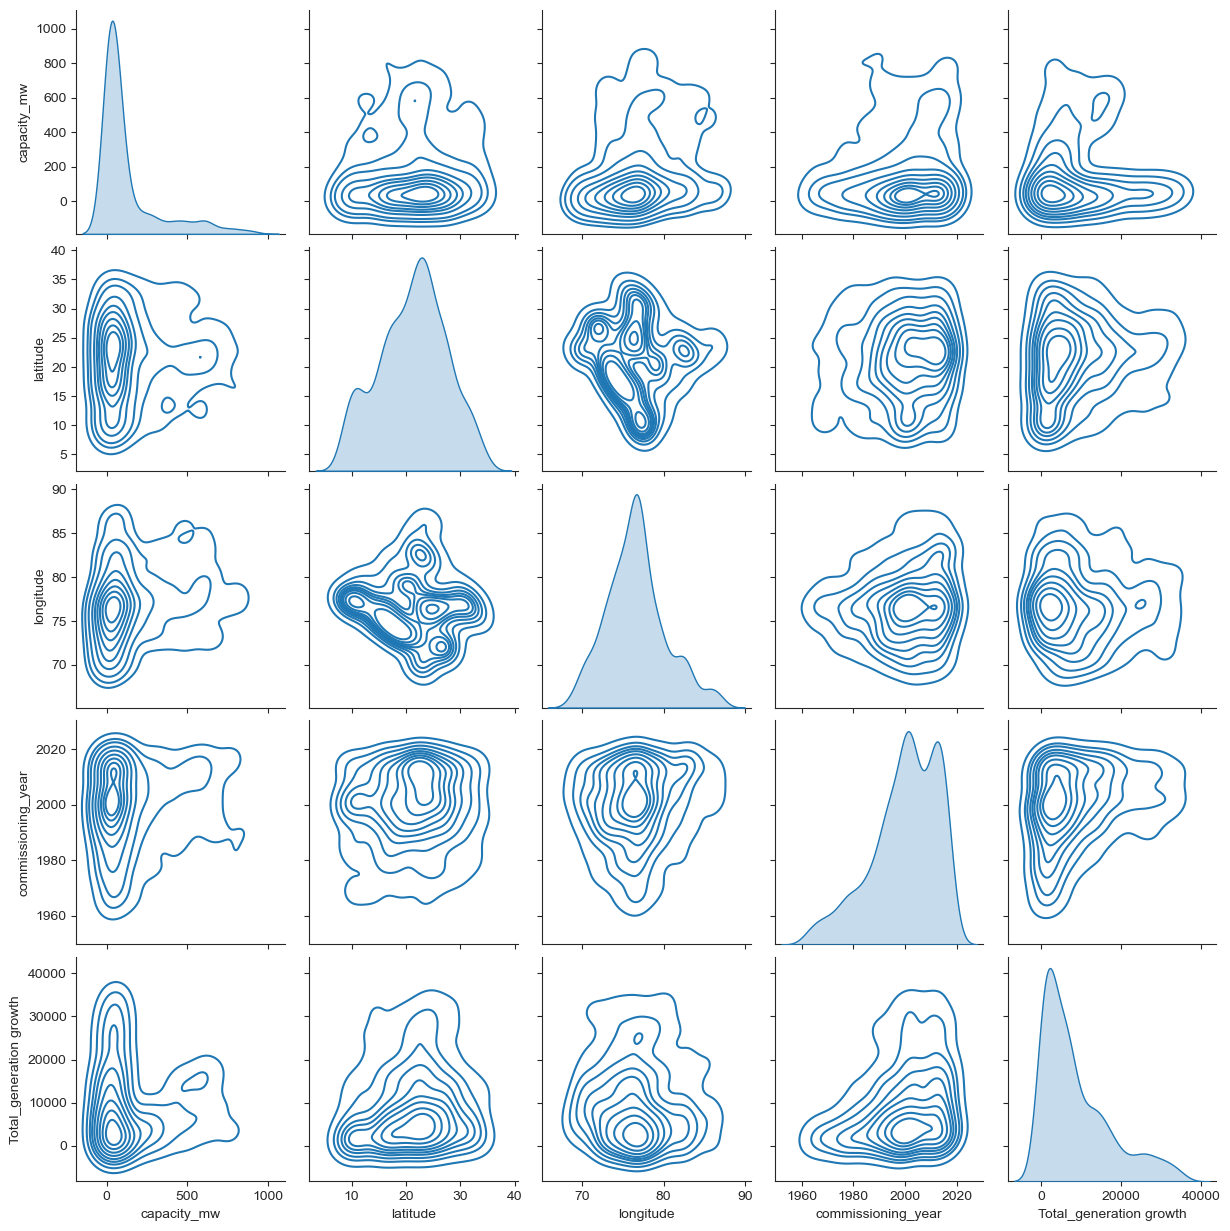

In [50]:
sns.pairplot(dataset,kind='kde')